In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
booking_df = pd.read_csv("Bookings.csv")
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [3]:
sessions_df = pd.read_csv("Sessions.csv")
sessions_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


## 1. Distinct bookings, sessions and searches

In [12]:
print("Distinct bookings are: ",len(booking_df['customer_id'].unique()))

Distinct bookings are:  306


In [13]:
print("Distinct sessions are: ",len(sessions_df['session_id'].unique()))

Distinct sessions are:  331


In [14]:
print("Distinct searches are: ",len(sessions_df['search_id'].unique()))

Distinct searches are:  1360


## 2. How many sessions have more than one booking

In [15]:
booking_df.columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],
      dtype='object')

In [16]:
sessions_df.columns

Index(['session_id', 'search_id', 'search_time', 'session_starting_time',
       'booking_id'],
      dtype='object')

In [17]:
merged_df = pd.merge(booking_df,sessions_df, on='booking_id')

In [19]:
merged_df.shape

(366, 17)

In [20]:
merged_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [22]:
merged_uniq_df = merged_df.drop_duplicates()
merged_uniq_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0,session_315,search_187,2020-02-14T12:14:45.487Z,2020-02-14T12:13:48Z
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z


In [23]:
merged_uniq_df.shape

(339, 17)

In [24]:
len(merged_uniq_df['booking_id'].unique())

338

In [25]:
len(merged_uniq_df['session_id'].unique())

329

In [32]:
merged_uniq_df[merged_uniq_df['session_id'].duplicated() == True]

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
149,customer_154,booking_147,Hyderābād,India,Dubai,United Arab Emirates,2018-09-11T14:03:16Z,Desktop,39829.60,YATRA,1.0,1.0,2555.1,session_324,search_1323,2018-09-11T13:57:48.980Z,2018-09-11T14:04:54.935Z
178,customer_195,booking_104,Delhi,India,Calgary,Canada,2018-10-04T15:09:59Z,Desktop,51683.20,YATRA,1.0,1.0,16520.3,session_290,search_33,2018-10-04T15:06:16.360Z,2018-10-04T14:04:19.974Z
198,customer_50,booking_28,Ahmedabad,India,Gurgaon,India,2020-02-05T16:08:14Z,Desktop,2980.21,MMT,1.0,8.0,747.8,session_231,search_556,2020-02-05T16:00:33.180Z,2020-02-05T16:00:20.320Z
208,customer_213,booking_0,Delhi,India,Madhyamgram,India,2021-12-09T19:47:40Z,Desktop,8565.60,GOIBIBO,1.0,5.0,1306.4,session_50,search_372,2021-12-09T19:33:42Z,2021-12-09T19:27:14.824Z
211,customer_1,booking_115,Gurgaon,India,Guwahati,India,2020-03-02T11:50:51Z,IOS,7233.60,YATRA,1.0,11.0,1476.4,session_196,search_1047,2020-03-02T11:47:43.499Z,2020-03-02T11:40:18Z
212,customer_289,booking_75,Rāja Sānsi,India,Fiumicino,Italy,2018-09-25T16:19:23Z,Desktop,51982.40,YATRA,2.0,3.0,5686.1,session_298,search_1344,2018-09-25T16:16:45.289Z,2018-09-25T16:10:52.146Z
227,customer_217,booking_194,Durlaga,India,Bhubaneswar,India,2021-09-10T19:12:36Z,Desktop,2176.00,GOIBIBO,1.0,56.0,260.5,session_27,search_567,2021-09-10T19:10:47Z,2021-09-10T19:03:05.124Z
276,customer_86,booking_142,Rāja Sānsi,India,Fiumicino,Italy,2018-12-01T20:01:36Z,Desktop,50968.80,YATRA,2.0,1.0,5686.1,session_76,search_34,2018-12-01T19:57:30.288Z,2018-12-01T19:56:55.162Z
346,customer_160,booking_278,Gurgaon,India,Patna,India,2020-01-28T16:35:05Z,Desktop,5232.60,MMT,1.0,2.0,862.3,session_154,search_571,2020-01-28T16:33:27.078Z,2020-01-28T16:11:01.369Z
358,customer_67,booking_328,Devanhalli,India,Gurgaon,India,2020-10-15T14:43:32Z,Desktop,5635.73,MMT,1.0,2.0,1694.7,session_134,search_564,2020-10-15T14:42:16Z,2020-10-15T14:39:47.196Z


In [150]:
grouped_session_df = merged_uniq_df.groupby(by=["session_id"])['booking_id'].count()
grouped_session_df

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64

In [201]:
moreThan1_bookings_list = []
for i in range(0, len(grouped_session_df)):
    if grouped_session_df[i] > 1:
      #  moreThan1_bookings_list = grouped_session_df.iloc[i:i+1]
        session_id = grouped_session_df.iloc[i:i+1].index.values   
        moreThan1_bookings_list.extend(session_id)
   
print("The sessions that have more than one booking are: ",moreThan1_bookings_list)
        

The sessions that have more than one booking are:  ['session_134', 'session_154', 'session_196', 'session_231', 'session_27', 'session_290', 'session_298', 'session_324', 'session_50', 'session_76']


## 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

In [202]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [204]:
booking_df['booking_date']=pd.to_datetime(booking_df['booking_time']).apply(lambda x: x.date())
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11


In [221]:
def date_to_weekday(date_value):
  return date_value.weekday()

booking_df['Day_of_week'] = booking_df['booking_date'].apply(date_to_weekday)
booking_df = booking_df.drop(['Day of week'],axis=1)
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1


In [223]:
booking_df['day_of_week_name'] = booking_df['Day_of_week']. map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [228]:
grouped_day_of_week_df = booking_df.groupby(by=["day_of_week_name"])['booking_id'].count()
grouped_day_of_week_df

day_of_week_name
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
Name: booking_id, dtype: int64

In [236]:
max_day_of_week = grouped_day_of_week_df.idxmax() # index of the max value 65 from above grouped DF
print("\"",max_day_of_week,"\" has the highest number of bookings")

" Thursday " has the highest number of bookings


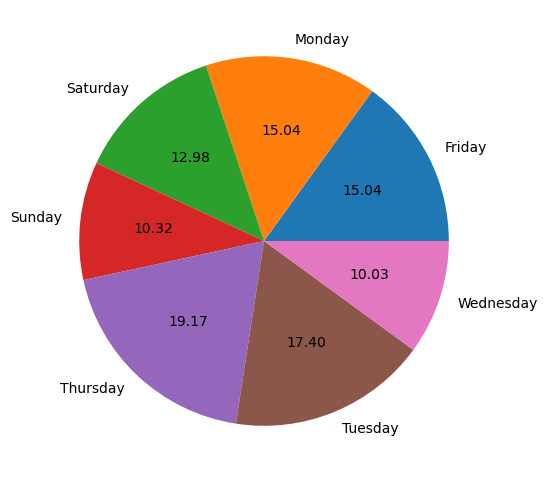

In [241]:
plt.figure(figsize=(6,6))
plt.pie(grouped_day_of_week_df, autopct='%.2f', labels = grouped_day_of_week_df.index)
plt.show()

## 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

In [243]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [245]:
grouped_service_name_df = booking_df.groupby(by=['service_name']).agg({'booking_id':'count','INR_Amount':'sum'})
grouped_service_name_df

,booking_id,INR_Amount
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


In [246]:
booking_df['service_name'].unique()

array(['MMT', 'YATRA', 'GOIBIBO'], dtype=object)

In [248]:
grouped_service_name_df.columns=['No. of Bookings','Total Gross Booking Value in INR']
grouped_service_name_df # This is the output for question 4

,No. of Bookings,Total Gross Booking Value in INR
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


## 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [277]:
booking_df.head(1)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday


In [495]:
route_counts = booking_df.groupby(['from_city', 'to_city']).size().reset_index(name='count')
route_counts

,from_city,to_city,count
0,Agartala,Gurgaon,1
1,Ahmedabad,Chicalim,1
2,Ahmedabad,Frankfurt am Main,1
3,Ahmedabad,Gurgaon,3
4,Ahmedabad,Gwalior,1
...,...,...,...
185,Thiruvananthapuram,London,1
186,Thiruvananthapuram,Riga,1
187,Thrissur,Thiruvananthapuram,1
188,Varanasi,Delhi,1


In [490]:
route_counts_multiple_bookings = route_counts[route_counts['count'] > 1]
route_counts_multiple_bookings

,from_city,to_city,count
3,Ahmedabad,Gurgaon,3
5,Ahmedabad,London,2
15,Bālāpur,Düsseldorf,2
16,Bālāpur,Frankfurt am Main,2
20,Chennai,Frankfurt am Main,3
...,...,...,...
172,Pune,Varanasi,2
174,Rāja Sānsi,Fiumicino,9
177,Rāja Sānsi,Gurgaon,3
181,Surat,Devanhalli,3


In [539]:
most_booked_route = route_counts_multiple_bookings.sort_values(by='count', ascending=False).iloc[0]
print(most_booked_route)

from_city              Gurgaon
to_city      Frankfurt am Main
count                       16
Name: 89, dtype: object


In [540]:
print("Most booked route for customers with more than 1 booking:", most_booked_route['from_city'], "to", most_booked_route['to_city'])

Most booked route for customers with more than 1 booking: Gurgaon to Frankfurt am Main


## 6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [541]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [558]:
booking_df['from_city'].value_counts()[booking_df['from_city'].value_counts() > 5]

from_city
Gurgaon        136
Mumbai          34
Delhi           29
Devanhalli      24
Rāja Sānsi      17
Chennai         16
Ahmedabad        8
New Delhi        7
Madhyamgram      6
Bālāpur          6
Name: count, dtype: int64

In [573]:
advance_booking_df = booking_df[booking_df['days_to_departure']>0].sort_values(by='days_to_departure',ascending=False)
advance_booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
71,customer_117,booking_163,Gurgaon,India,Barcelona,Spain,2022-03-30T20:13:00Z,MobileWeb,62355.2,MMT,1.0,311.0,6765.0,2022-03-30,2,Wednesday
230,customer_139,booking_148,Devanhalli,India,Frankfurt am Main,Germany,2022-04-05T09:51:52Z,Desktop,75257.6,MMT,2.0,226.0,7394.2,2022-04-05,1,Tuesday
212,customer_103,booking_209,Mumbai,India,Ahmedabad,India,2020-02-03T12:54:03Z,Android,9560.8,MMT,4.0,218.0,441.3,2020-02-03,0,Monday
130,customer_267,booking_240,Gurgaon,India,Roissy-en-France,France,2019-09-07T22:30:03Z,IOS,25140.8,GOIBIBO,1.0,188.0,6854.8,2019-09-07,5,Saturday
39,customer_248,booking_8,Gurgaon,India,Roissy-en-France,France,2019-06-30T12:26:58Z,Tablet,23280.0,YATRA,1.0,171.0,6854.8,2019-06-30,6,Sunday


In [574]:
top_3_departure_cities = advance_booking_df['from_city'].value_counts()[advance_booking_df['from_city'].value_counts() > 5].head(3)
print("Top 3 departure cities for advance bookings (with at least 5 departures):")
print(top_3_departure_cities)

Top 3 departure cities for advance bookings (with at least 5 departures):
from_city
Gurgaon    131
Mumbai      34
Delhi       29
Name: count, dtype: int64


In [577]:
top_3_departure_cities = booking_df[booking_df['days_to_departure'] > 0].groupby('from_city').filter(lambda x: len(x) >= 5)['from_city'].value_counts().head(3)
print("Top 3 departure cities with advance bookings and having atleast 5 departures are: ")
print(top_3_departure_cities)

Top 3 departure cities with advance bookings and having atleast 5 departures are: 
from_city
Gurgaon    131
Mumbai      34
Delhi       29
Name: count, dtype: int64


## 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

In [578]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [580]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
 13  booking_date       339 non-null    object 
 14  Day_of_week        339 non-null    int64  
 15  day_of_week_name   339 non-null    object 
dtypes: float64(4), int64(1), o

In [589]:
numerical_booking_df = booking_df[['INR_Amount','no_of_passengers','days_to_departure','distance_km']].copy()
numerical_booking_df

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4
...,...,...,...,...
334,2721.60,1.0,26.0,421.0
335,6552.00,1.0,0.0,1274.7
336,126502.46,2.0,109.0,7190.9
337,55152.80,2.0,22.0,6760.0


In [601]:
booking_corr = numerical_booking_df.corr()
booking_corr

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.397229,0.284534,0.623565
no_of_passengers,0.397229,1.000000,0.187128,0.001698
days_to_departure,0.284534,0.187128,1.000000,0.216972
distance_km,0.623565,0.001698,0.216972,1.000000


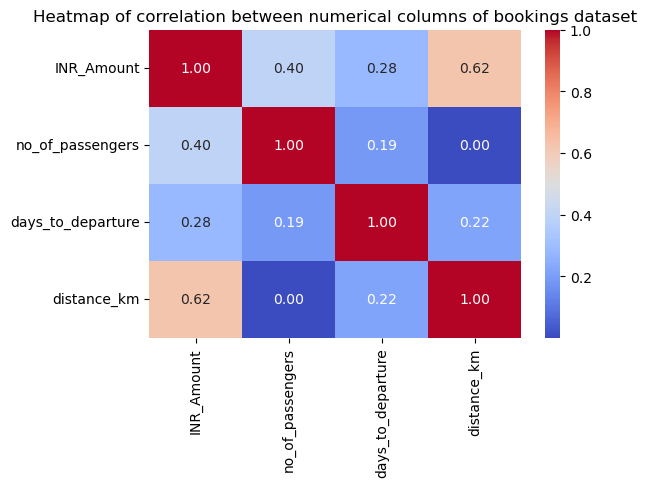

In [602]:
plt.figure(figsize=(6, 4))
sns.heatmap(booking_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of correlation between numerical columns of bookings dataset')
plt.show()

In [603]:
max_corr = booking_corr.unstack().sort_values(ascending=False).drop_duplicates()
max_corr

INR_Amount         INR_Amount           1.000000
                   distance_km          0.623565
                   no_of_passengers     0.397229
                   days_to_departure    0.284534
days_to_departure  distance_km          0.216972
no_of_passengers   days_to_departure    0.187128
                   distance_km          0.001698
dtype: float64

In [604]:
max_corr_pair = max_corr[max_corr < 1].idxmax()
max_corr_pair

('INR_Amount', 'distance_km')

In [605]:
print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair} with correlation coefficient {max_corr[max_corr_pair]}")

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'distance_km') with correlation coefficient 0.6235653096997817


## 8. For each service, which is the most used device type for making bookings on the platform?

In [606]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [612]:
service_group = booking_df.groupby(['service_name','device_type_used']).size().reset_index(name='booking_count')
service_group

,service_name,device_type_used,booking_count
0,GOIBIBO,Android,44
1,GOIBIBO,Desktop,61
2,GOIBIBO,IOS,70
3,GOIBIBO,MobileWeb,11
4,MMT,Android,8
5,MMT,Desktop,30
6,MMT,IOS,5
7,MMT,MobileWeb,5
8,YATRA,Android,18
9,YATRA,Desktop,51


In [621]:
service_group_max = service_group.groupby('service_name')['booking_count'].idxmax()
service_group_max

service_name
GOIBIBO    2
MMT        5
YATRA      9
Name: booking_count, dtype: int64

In [628]:
max_service_device = service_group.loc[service_group_max]
print("For each service, the most used device type for making bookings on the platform are as follows: ")
print(max_service_device)

For each service, the most used device type for making bookings on the platform are as follows: 
  service_name device_type_used  booking_count
2      GOIBIBO              IOS             70
5          MMT          Desktop             30
9        YATRA          Desktop             51


## 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

In [629]:
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday


In [633]:
booking_df['booking_dt'] = pd.to_datetime(booking_df['booking_time'])
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name,booking_dt
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday,2020-02-05 16:12:08+00:00
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday,2018-11-21 08:21:47+00:00
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday,2019-12-16 22:54:58+00:00
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday,2021-10-29 12:25:38+00:00
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday,2020-08-11 16:09:10+00:00


In [637]:
booking_df['year']=booking_df['booking_dt'].dt.year
booking_df['quarter']=booking_df['booking_dt'].dt.quarter
booking_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date,Day_of_week,day_of_week_name,booking_dt,year,quarter
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05,2,Wednesday,2020-02-05 16:12:08+00:00,2020,1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21,2,Wednesday,2018-11-21 08:21:47+00:00,2018,4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16,0,Monday,2019-12-16 22:54:58+00:00,2019,4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29,4,Friday,2021-10-29 12:25:38+00:00,2021,4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11,1,Tuesday,2020-08-11 16:09:10+00:00,2020,3


In [638]:
quarterly_device_bk = booking_df.groupby(['year','quarter','device_type_used']).size().reset_index(name='booking_count')
quarterly_device_bk

,year,quarter,device_type_used,booking_count
0,2018,3,Android,3
1,2018,3,Desktop,6
2,2018,3,MobileWeb,2
3,2018,3,Tablet,1
4,2018,4,Android,3
5,2018,4,Desktop,22
6,2018,4,IOS,4
7,2018,4,MobileWeb,4
8,2018,4,Tablet,1
9,2019,1,Desktop,1


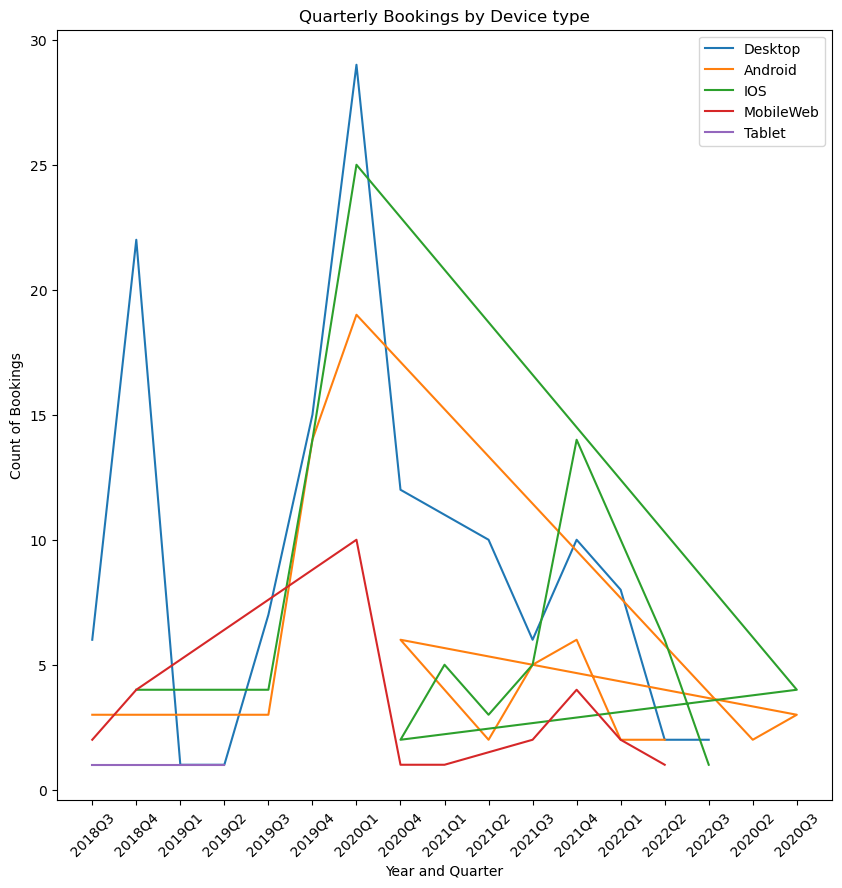

In [661]:
plt.figure(figsize=(10,10))
device_types = booking_df['device_type_used'].unique()
for d in device_types:
    device_data = quarterly_device_bk[quarterly_device_bk['device_type_used'] == d]
    plt.plot(device_data['year'].astype(str)+'Q'+device_data['quarter'].astype(str),device_data['booking_count'],label=d)

plt.xlabel('Year and Quarter')
plt.ylabel('Count of Bookings')
plt.title('Quarterly Bookings by Device type')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 10. Consider the following example: 12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total. searches=100 bookings=10 customers=12. The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:  • What is the average oBSR for each month of the year? • What is the average oBSR for each day of the week? • Plot a time series of oBSR on all the given dates.

In [662]:
merged_uniq_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [687]:
merged_uniq_df['booking_date'] = pd.to_datetime(merged_uniq_df['booking_time'])
merged_uniq_df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9236\1396035294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_uniq_df['booking_date'] = pd.to_datetime(merged_uniq_df['booking_time'])


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,booking_date
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,2020-02-05 16:12:08+00:00
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,2018-11-21 08:21:47+00:00
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,2019-12-16 22:54:58+00:00
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,2021-10-29 12:25:38+00:00
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,2020-08-11 16:09:10+00:00


In [667]:
daily_counts = merged_uniq_df.groupby('booking_date').agg({'search_id': 'count', 'booking_id': 'nunique'}).reset_index()
daily_counts

,booking_date,search_id,booking_id
0,2018-09-04 16:45:23+00:00,1,1
1,2018-09-11 14:03:16+00:00,1,1
2,2018-09-11 14:08:05+00:00,1,1
3,2018-09-21 16:29:59+00:00,1,1
4,2018-09-21 16:47:29+00:00,1,1
...,...,...,...
333,2022-06-29 09:15:16+00:00,1,1
334,2022-06-29 10:51:14+00:00,1,1
335,2022-07-01 08:28:24+00:00,1,1
336,2022-07-06 16:15:47+00:00,1,1


In [669]:
daily_counts.columns = ['booking_date', 'searches', 'bookings']
daily_counts

,booking_date,searches,bookings
0,2018-09-04 16:45:23+00:00,1,1
1,2018-09-11 14:03:16+00:00,1,1
2,2018-09-11 14:08:05+00:00,1,1
3,2018-09-21 16:29:59+00:00,1,1
4,2018-09-21 16:47:29+00:00,1,1
...,...,...,...
333,2022-06-29 09:15:16+00:00,1,1
334,2022-06-29 10:51:14+00:00,1,1
335,2022-07-01 08:28:24+00:00,1,1
336,2022-07-06 16:15:47+00:00,1,1


In [670]:
daily_counts['oBSR'] = daily_counts['bookings'] / daily_counts['searches']
daily_counts.head()

,booking_date,searches,bookings,oBSR
0,2018-09-04 16:45:23+00:00,1,1,1.0
1,2018-09-11 14:03:16+00:00,1,1,1.0
2,2018-09-11 14:08:05+00:00,1,1,1.0
3,2018-09-21 16:29:59+00:00,1,1,1.0
4,2018-09-21 16:47:29+00:00,1,1,1.0


In [673]:
daily_counts['month']=daily_counts['booking_date'].dt.month
daily_counts['day_of_week']=daily_counts['booking_date'].dt.day_name()

In [674]:
daily_counts.head()

,booking_date,searches,bookings,oBSR,month,day_of_week
0,2018-09-04 16:45:23+00:00,1,1,1.0,9,Tuesday
1,2018-09-11 14:03:16+00:00,1,1,1.0,9,Tuesday
2,2018-09-11 14:08:05+00:00,1,1,1.0,9,Tuesday
3,2018-09-21 16:29:59+00:00,1,1,1.0,9,Friday
4,2018-09-21 16:47:29+00:00,1,1,1.0,9,Friday


In [677]:
avg_monthly_oBSR=daily_counts.groupby('month')['oBSR'].mean()
print("1. Average oBSR for each month of the year is as follows:")
print(avg_monthly_oBSR)

1. Average oBSR for each month of the year is as follows:
month
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    0.989583
11    1.000000
12    1.000000
Name: oBSR, dtype: float64


In [680]:
avg_daily_oBSR=daily_counts.groupby('day_of_week')['oBSR'].mean()
print("2. Average oBSR for each day of the week is as follows:")
print(avg_daily_oBSR)

2. Average oBSR for each day of the week is as follows:
day_of_week
Friday       1.000000
Monday       1.000000
Saturday     0.988636
Sunday       1.000000
Thursday     1.000000
Tuesday      1.000000
Wednesday    1.000000
Name: oBSR, dtype: float64


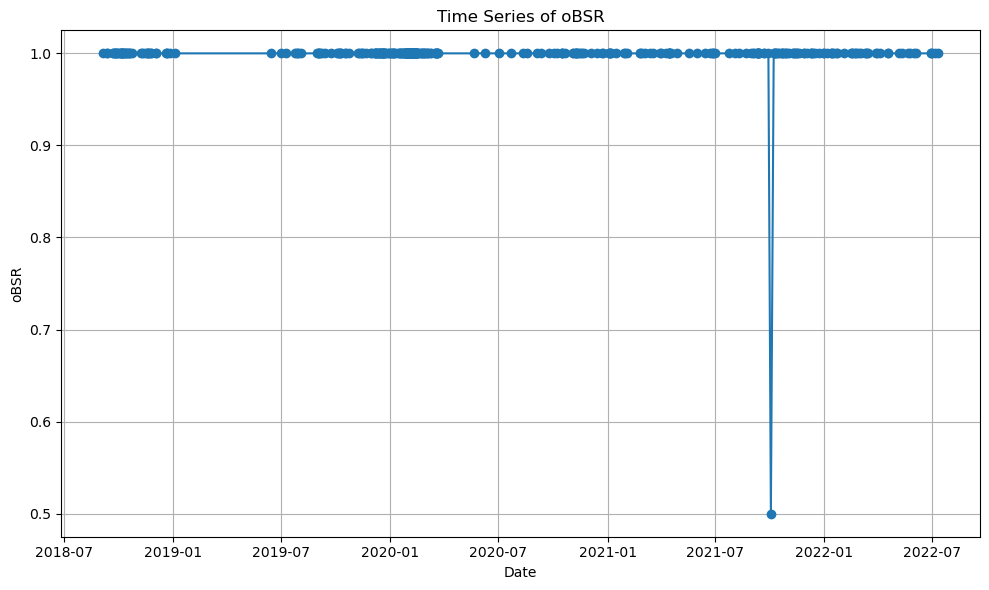

In [685]:
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['booking_date'], daily_counts['oBSR'], marker='o', linestyle='-')
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.tight_layout()
plt.show()